In [3]:
import os
import time
import sys
import warnings

sys.path.append("/home/prakank/anaconda3/lib/python3.8/site-packages/")

import scipy
import numpy as np
from cvxopt import matrix, solvers

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

from python.svmutil import *

In [4]:
BINARY_CLASSIFICATION = True
LAST_DIGIT = 1
BASE_DIR = "../"
train_path = os.path.join(BASE_DIR, "data", "mnist","train.csv")
test_path  = os.path.join(BASE_DIR, "data", "mnist","test.csv")

In [5]:
def load_data(filename, Binary):
    data = np.genfromtxt(filename,delimiter=',')
    data_x = data[:,:784]/255
    data_y = data[:,784]
    data_y = data_y.reshape((data_y.shape[0],1))
    
    if Binary:
        data_x = data_x[(data_y==LAST_DIGIT).reshape(-1) | ( data_y==((LAST_DIGIT+1)%10) ).reshape(-1)]
        data_y = data_y[(data_y==LAST_DIGIT).reshape(-1) | ( data_y==((LAST_DIGIT+1)%10) ).reshape(-1)]
        data_y = -1.0*(data_y==LAST_DIGIT) + 1.0*(data_y==((LAST_DIGIT+1)%10))
        
    return data_x,data_y

In [6]:
# Part B
BINARY_CLASSIFICATION = False

if not BINARY_CLASSIFICATION:
    X_train, Y_train = load_data(train_path, BINARY_CLASSIFICATION)
    X_test, Y_test  = load_data(test_path, BINARY_CLASSIFICATION)

In [6]:
model = svm_train(Y_train.reshape(-1), X_train, '-s 0 -c 1 -t 2 -g 0.05 -q')
label_predict1, accuracy, decision_values=svm_predict(Y_train.reshape(-1),X_train,model,'-q')
print("Train Accuracy :", accuracy_score(label_predict1, Y_train))

confusion_matrix1 = np.zeros((10,10))
for i in range(Y_train.shape[0]):
    confusion_matrix1[Y_train[i]][label_predict1[i]] += 1
print("Training set")
print(confusion_matrix1.astype(int))


label_predict2, accuracy, decision_values=svm_predict(Y_test.reshape(-1),X_test,model, '-q')
print("Test Accuracy :", accuracy_score(label_predict2, Y_test))

confusion_matrix2 = np.zeros((10,10))
for i in range(Y_test.shape[0]):
    confusion_matrix2[Y_test[i]][label_predict2[i]] += 1
print("Test set")
print(confusion_matrix2.astype(int))

Train Accuracy : 0.9992


IndexError: arrays used as indices must be of integer (or boolean) type

In [7]:
Y_train = Y_train.reshape(-1)
Y_test = Y_test.reshape(-1)

In [17]:
confusion_matrix1 = np.zeros((10,10))
for i in range(Y_train.shape[0]):
    confusion_matrix1[int(Y_train[i])][int(label_predict1[i])] += 1
print("Training set")
print(confusion_matrix1.astype(int))


Training set
[[2000    0    0    0    0    0    0    0    0    0]
 [   0 1997    1    0    1    0    0    1    0    0]
 [   0    0 2000    0    0    0    0    0    0    0]
 [   0    0    0 1999    0    0    0    1    0    0]
 [   0    0    0    0 1999    0    0    0    0    1]
 [   0    0    0    0    0 2000    0    0    0    0]
 [   0    0    0    0    1    0 1999    0    0    0]
 [   0    2    1    0    1    0    0 1995    0    1]
 [   0    1    0    0    0    0    0    0 1999    0]
 [   0    0    0    0    2    0    0    2    0 1996]]


In [18]:
label_predict2, accuracy, decision_values=svm_predict(Y_test.reshape(-1),X_test,model, '-q')
print("Test Accuracy :", accuracy_score(label_predict2, Y_test))

confusion_matrix2 = np.zeros((10,10))
for i in range(Y_test.shape[0]):
    confusion_matrix2[int(Y_test[i])][int(label_predict2[i])] += 1
print("Test set")
print(confusion_matrix2.astype(int))

Test Accuracy : 0.9723
Test set
[[ 969    0    1    0    0    3    4    1    2    0]
 [   0 1121    3    2    1    2    2    0    3    1]
 [   4    0 1000    4    2    0    1    6   15    0]
 [   0    0    8  985    0    4    0    6    5    2]
 [   0    0    4    0  962    0    6    0    2    8]
 [   2    0    3    6    1  866    7    1    5    1]
 [   6    3    0    0    4    4  939    0    2    0]
 [   1    4   19    2    4    0    0  987    2    9]
 [   4    0    3   10    1    5    3    3  942    3]
 [   4    4    3    8   13    4    0    9   12  952]]


In [26]:
print(np.sum(confusion_matrix2,axis=1))
for i in range(10):
    print( 1 - (confusion_matrix2[i][i]/np.sum(confusion_matrix2,axis=1)[i]),(confusion_matrix2[i][i]/np.sum(confusion_matrix2,axis=1)[i]))

[ 980. 1135. 1032. 1010.  982.  892.  958. 1028.  974. 1009.]
0.011224489795918391 0.9887755102040816
0.012334801762114544 0.9876651982378855
0.03100775193798455 0.9689922480620154
0.024752475247524774 0.9752475247524752
0.020366598778004064 0.9796334012219959
0.029147982062780242 0.9708520179372198
0.019832985386221247 0.9801670146137788
0.03988326848249024 0.9601167315175098
0.03285420944558526 0.9671457905544147
0.05649157581764119 0.9435084241823588


In [29]:
count = 10
ind   = []
for i in range(Y_test.shape[0]):
    if count == 0:
        break
    if Y_test[i] != label_predict2[i]:
        ind.append(i)
        count-=1

In [30]:
print(ind)

[33, 124, 151, 241, 247, 259, 320, 321, 324, 340]


In [34]:
from PIL import Image as im

In [49]:
for i in ind:
    digit_image = X_test[i]
    digit_image = np.array((digit_image.reshape((28,28)))*255).astype(np.uint8)
    data = im.fromarray(digit_image)
    data.save("Ind:" + str(i) + "_orig:" + str(int(Y_test[i][0]))  + "_pred:" + str(int(label_predict2[i]))+"_.png")

In [8]:
import time
from sklearn.model_selection import train_test_split

# x_train, x_val, y_train, y_val = train_test_split(X_train, Y_train, test_size = 0.2)
C_list = [1e-5, 1e-3, 1, 5, 10]

acc_train = []
acc_pred  = []
time_list = []

for C in C_list:
    print("\nValue of C: " + str(C))
    start = time.time()
    
    x_train, x_val, y_train, y_val = train_test_split(X_train, Y_train, test_size = 0.2)
    command = '-s 0 -t 2 -g 0.05 -c ' + str(C) + ' -q'
    model = svm_train(y_train.reshape(-1), x_train, command)
    
    y_pred, accuracy, dec_values = svm_predict(y_val.reshape(-1), x_val, model, '-q')
    temp_acc = accuracy_score(y_pred, y_val)
    print("Validation Set (Dev set): {}".format(temp_acc))
    acc_train.append(temp_acc)

    
    y_pred, accuracy, dec_values = svm_predict(Y_test.reshape(-1), X_test, model, '-q')
    temp_acc = accuracy_score(y_pred, Y_test)
    print("Test Set (Dev set): {}".format(temp_acc))
    acc_pred.append(temp_acc)
    
    end = time.time()
    
    time_list.append(round(end-start,5))




Value of C: 1e-05
Validation Set (Dev set): 0.09275
Test Set (Dev set): 0.1009

Value of C: 0.001
Validation Set (Dev set): 0.0935
Test Set (Dev set): 0.1009

Value of C: 1
Validation Set (Dev set): 0.97175
Test Set (Dev set): 0.9705

Value of C: 5
Validation Set (Dev set): 0.97325
Test Set (Dev set): 0.9715

Value of C: 10
Validation Set (Dev set): 0.97125
Test Set (Dev set): 0.9706


In [ ]:
# Value of C: 1e-05
# Validation Set (Dev set): 0.09275
# Test Set (Dev set): 0.1009

# Value of C: 0.001
# Validation Set (Dev set): 0.0935
# Test Set (Dev set): 0.1009

# Value of C: 1
# Validation Set (Dev set): 0.97175
# Test Set (Dev set): 0.9705

# Value of C: 5
# Validation Set (Dev set): 0.97325
# Test Set (Dev set): 0.9715

# Value of C: 10
# Validation Set (Dev set): 0.97125
# Test Set (Dev set): 0.9706

In [10]:
y1 = [0.09275, 0.0935, 0.97175, 0.97325, 0.97125]
y2 = [0.1009, 0.1009, 0.9705, 0.9715, 0.9706]
x = [1e-5, 1e-3, 1, 5, 10]

In [11]:
import numpy as np
import matplotlib.pyplot as plt

In [12]:
x  = np.array(x)
y1 = np.array(y1)
y2 = np.array(y2)


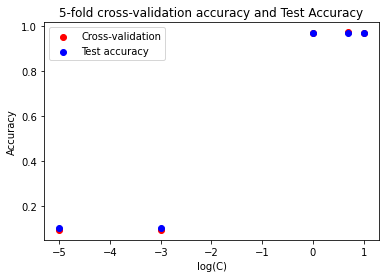

In [16]:
plt.title('5-fold cross-validation accuracy and Test Accuracy')
plt.xlabel('log(C)')
plt.ylabel('Accuracy')
plt.scatter(np.log10(x),y1,color='red',label='Cross-validation')
plt.scatter(np.log10(x),y2,color='blue',label='Test accuracy')
plt.legend()
plt.savefig('Cross-validation accuracy and Test Accuracy.jpg')
plt.show()